# Activity 11: Video Processing

### Step 1: Setting up and testing blob detector

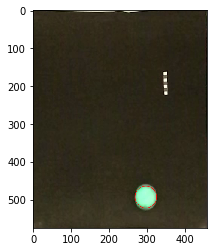

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

#Filter by Area.
params.filterByArea = True
params.minArea = 200

#Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5

params.filterByColor =  False
params.blobColor = 200

#Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.1

params.filterByConvexity = False

#Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)


image = cv2.imread('pics/frame213.jpg')
image = image[385:960,120:580]
keypoints = detector.detect(image)
im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# plt.figure(figsize=(20,10))
plt.imshow(im_with_keypoints)
plt.show()

### Step 2: Finding scale

Note: Each box on the scale is 1 cm.

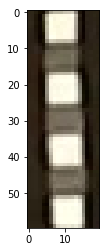

In [80]:
plt.imshow(image[163:223,340:360]) #Cropping scale

60 px = 7 cm

Scale: 1 px = 0.117 cm

### Step 3: Using blob detection on the ball and tracking the centroid

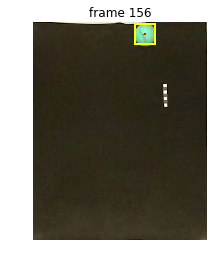

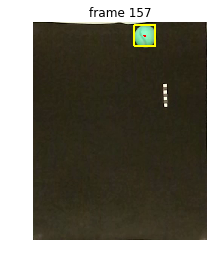

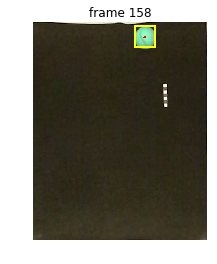

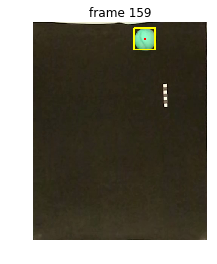

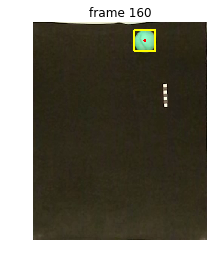

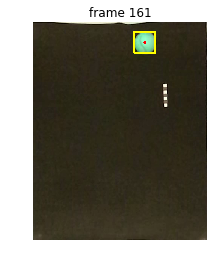

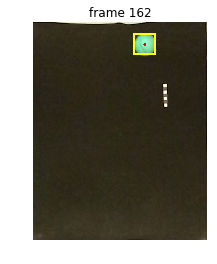

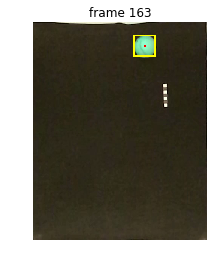

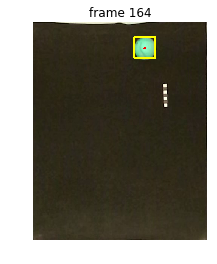

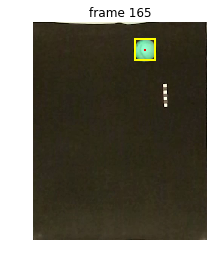

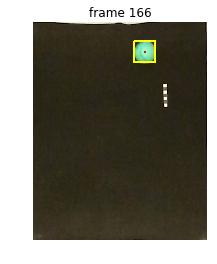

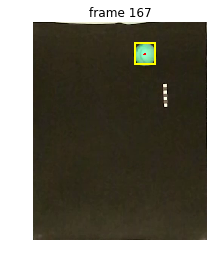

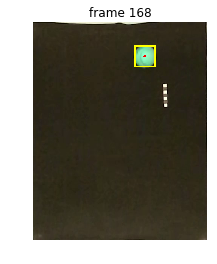

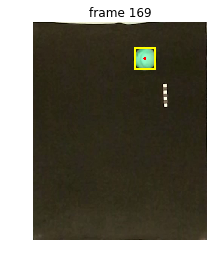

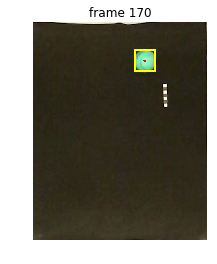

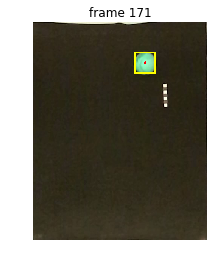

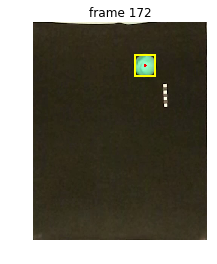

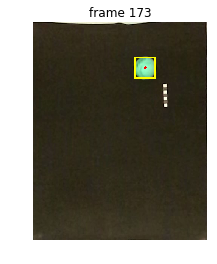

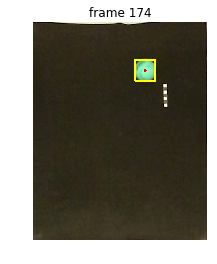

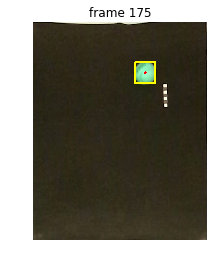

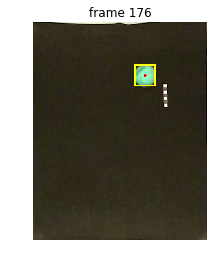

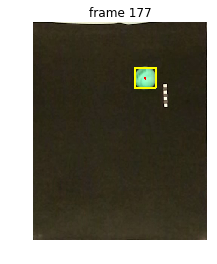

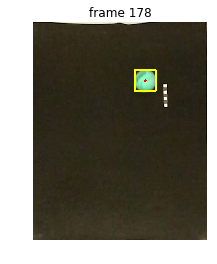

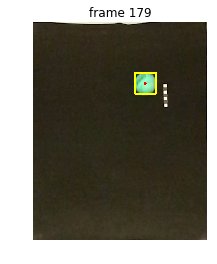

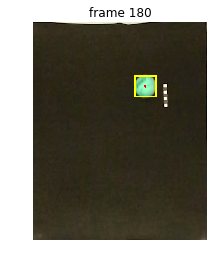

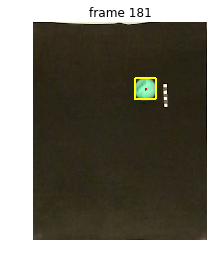

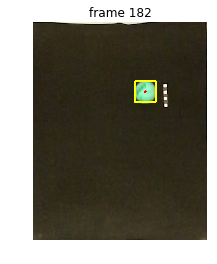

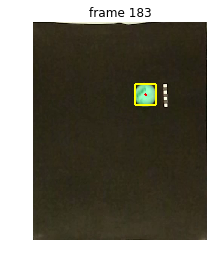

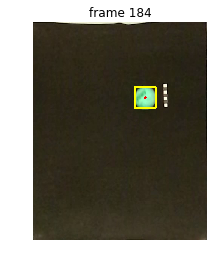

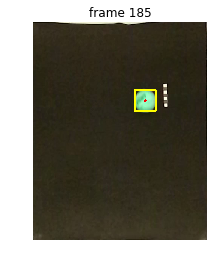

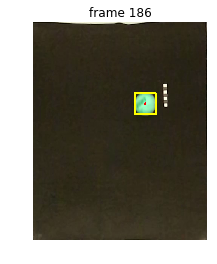

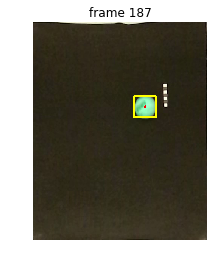

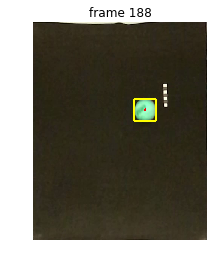

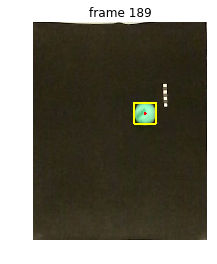

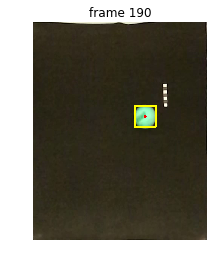

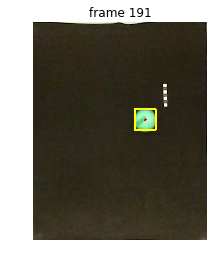

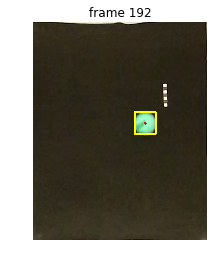

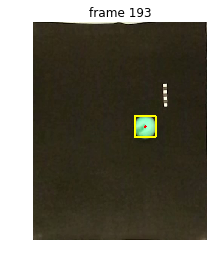

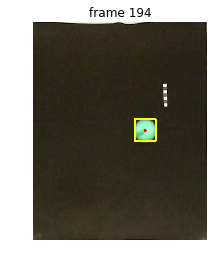

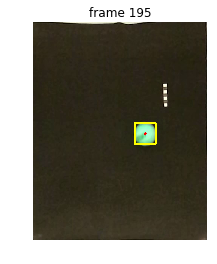

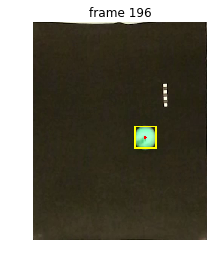

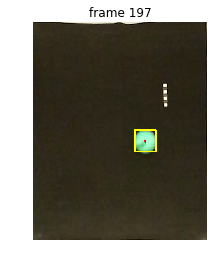

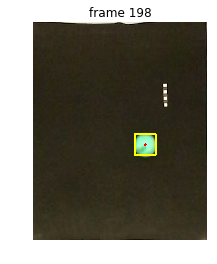

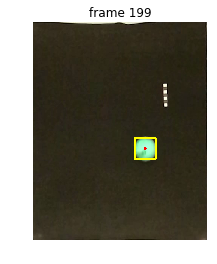

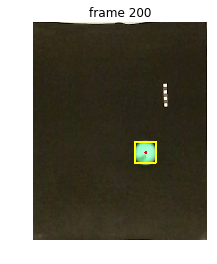

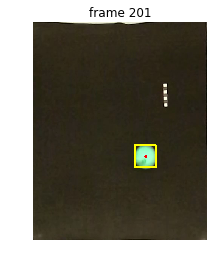

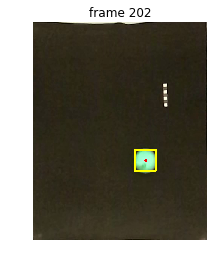

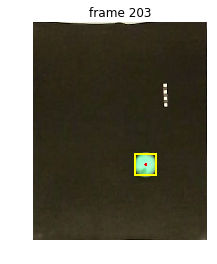

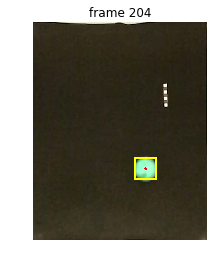

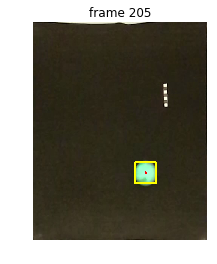

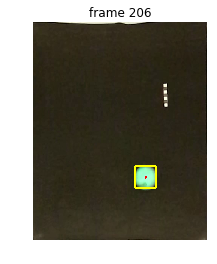

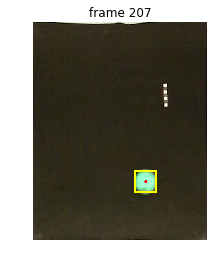

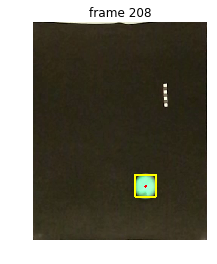

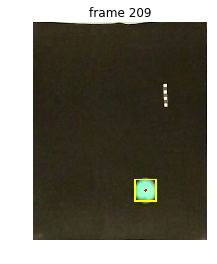

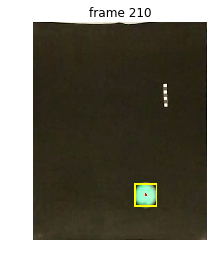

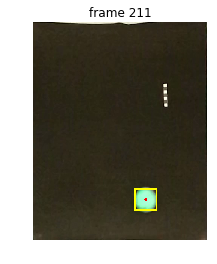

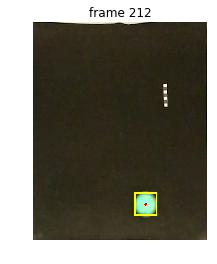

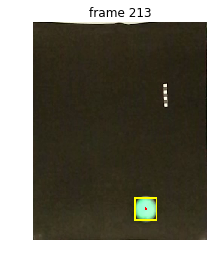

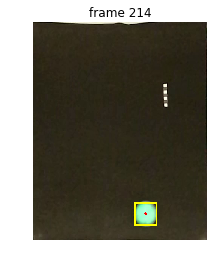

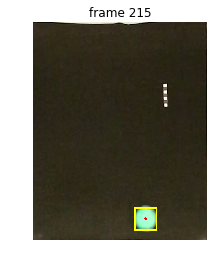

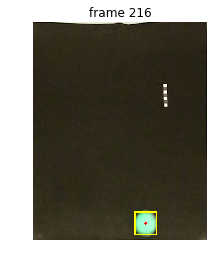

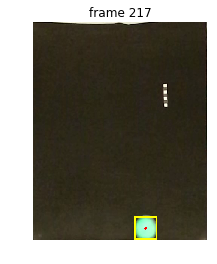

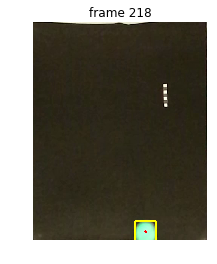

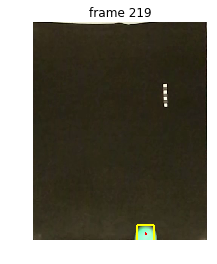

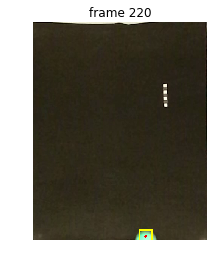

In [99]:
# first_frame = 135
# last_frame = 242
first_frame = 156
last_frame = 220
frames = range(first_frame,last_frame+1)

#To keep track of the centroids of the ball for each frame
centroids = []
for i in frames:
    
    #Detect ball
    keypoints = detector.detect(image)
    
    #Draw center and square
    pt = keypoints[0].pt
    d = keypoints[0].size
    im_with_sq = cv2.rectangle(image,(int(pt[0]-d/2),int(pt[1]-d/2)),(int(pt[0]+d/2),int(pt[1]+d/2)),(255,255,0),4)
    im_with_sq = cv2.rectangle(image,(int(pt[0]),int(pt[1])), (int(pt[0]+1),int(pt[1]+1)), (255,0,0), 5)
    
    #Record position of the ball 
    centroids.append(keypoints[0])

    #Plot and save image
    plt.title('frame '+str(i))
    plt.imshow(im_with_sq)
    plt.axis('off')
    plt.imsave('pics/DETECTED/'+str(i)+'.jpg', im_with_sq)
    plt.show()

### Step 4: Finding g

Part 1: Getting trajectory of the ball

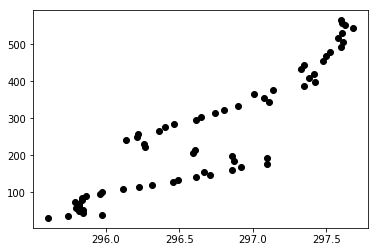

In [53]:
traj_x = [] 
traj_y = []

#Getting x and y values
for keypoint in centroids:
    x,y = keypoint.pt
    traj_x.append(x)
    traj_y.append(y)

plt.plot(traj_x,traj_y,'ko')

Part 2: Converting frames to time

In [87]:
fps = 240
time = (1/240)*np.array(frames)

Part 3: Fitting with data

In [103]:
#Define function
def y(t,g,v0,y0):
    return y0 + v0*t + (1/2)*g*(t**2)

from scipy.optimize import curve_fit

popt,pcov = curve_fit(y,time,traj_y)
g_fit, v0_fit, y0_fit = popt

#value of g in px/s^2
print(str(g_fit)+' px/s^2')

8118.752006789035 px/s^2


In [104]:
print("g = " + str(g_fit*((7/60)*0.01)))

g = 9.471877341253874
